## Capstone Project

In [1]:
#To handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Load the Dataset

In [2]:
#Load the data using Pandas
filePath = '/Users/namithabhaskar/Documents/MsSem4ClassworkAssignments/capstoneProject/Data/Diabetes/archive/diabetes_binary_health_indicators_BRFSS2015.csv'
fulldf = pd.read_csv(filePath)
fulldf.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
fulldf.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


### Dataset Size 

In [4]:
print("Total size: ",fulldf.shape)
print("Number of Rows: ", fulldf.shape[0])
print("Number of columns: ", fulldf.shape[1])
print("Number of Predictors: ",fulldf.shape[1]-1)

Total size:  (253680, 22)
Number of Rows:  253680
Number of columns:  22
Number of Predictors:  21


### Dataset Info

In [5]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Checking for Missing Values

In [6]:
fulldf.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#### No Missing Values

### Dataset Description

In [7]:
fulldf.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


### Duplicate Values in the Dataset

In [8]:
print("Number of duplicate rows in the dataset: ", fulldf.duplicated().sum())

Number of duplicate rows in the dataset:  24206


### Dropping the Duplicate Values

In [9]:
fulldf.drop_duplicates(inplace = True)
print(f"{fulldf.duplicated().sum()} Duplicated values remaining.")

0 Duplicated values remaining.


In [10]:
print("Size after dropping duplicate values: ", fulldf.shape)

Size after dropping duplicate values:  (229474, 22)


### Frequency Analysis of Each Variable

In [11]:
for col in fulldf.columns:
  print(f"{col} : {fulldf[col].value_counts()}\n")

Diabetes_binary : Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

HighBP : HighBP
0.0    125214
1.0    104260
Name: count, dtype: int64

HighChol : HighChol
0.0    128129
1.0    101345
Name: count, dtype: int64

CholCheck : CholCheck
1.0    220176
0.0      9298
Name: count, dtype: int64

BMI : BMI
27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

Smoker : Smoker
0.0    122585
1.0    106889
Name: count, dtype: int64

Stroke : Stroke
0.0    219190
1.0     10284
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0.0    205761
1.0     23713
Name: count, dtype: int64

PhysActivity : PhysActivity
1.0    168214
0.0     61260
Name: count, dtype: int64

Fruits : Fruits
1.0    140593
0.0     88881
Name: count, dtype: int64

Veggies : Veggies
1.0    182337
0.0     47137
Name: count, dtype: int64

HvyAlcoholConsump

### Changing Bin Size of Age, Education, Income Variables

In [12]:
# AGE 
# Define the mapping from 13 categories to 3 integer groups
age_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1,  # Categories 1-4 → 1 (18-39)
    5: 2, 6: 2, 7: 2, 8: 2, 9: 2,  # Categories 5-9 → 2 (40-64)
    10: 3, 11: 3, 12: 3, 13: 3  # Categories 10-13 → 3 (65-99)
}

# Apply the mapping to create a new column
fulldf["Age_Categorized"] = fulldf["Age"].map(age_mapping)

# Display the counts of new categories
print(fulldf["Age_Categorized"].value_counts())

Age_Categorized
2    111391
3     83256
1     34827
Name: count, dtype: int64


**Existing Bin 1-4 has been grouped together as 1. So 1 now depicts ages 18-39**  
**Existing Bin 5-9 has been grouped together as 2. So 2 now depicts ages 40-64**  
**Existing Bin 10-13 has been grouped together as 3. So 3 now depicts ages 65-99**

In [13]:
# EDUCATION
# Define the mapping for Education categories
education_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1,  # Combine categories 1-4 → 1 (Up to High School)
    5: 2,  # Keep category 5 → 2 (Some College)
    6: 3   # Keep category 6 → 3 (College Graduate)
}

# Apply the mapping to create a new column
fulldf["Education_Categorized"] = fulldf["Education"].map(education_mapping)

# Display the counts of new categories
print(fulldf["Education_Categorized"].value_counts())

Education_Categorized
3    88225
1    74805
2    66444
Name: count, dtype: int64


**Existing Bins 1-4 has been grouped as 1. It depicts people who have upto High School Education**  
**Existing Bin 5 has been retained and named as 2. It depicts people who have 1-3 years of College Education**.  
**Existing Bin 6 has also been retained and name as 3. It depicts people who are College Graduates or more**. 

In [14]:
# INCOME
# Define the mapping for Education categories
income_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1,  # Combine categories 1-5 → 1 ($0 - $35,000)
    6: 2, 7: 2,  # Keep category 6-7 → 2 ($35,000 - $75,000)
    8: 3   # Keep category 8 → 3 (more than $75,000)
}

# Apply the mapping to create a new column
fulldf["Income_Categorized"] = fulldf["Income"].map(income_mapping)

# Display the counts of new categories
print(fulldf["Income_Categorized"].value_counts())

Income_Categorized
1    82746
2    75088
3    71640
Name: count, dtype: int64


**Existing Bins 1-5 has been grouped as 1. It depicts household with annual income upto 35,000**.    
**Existing Bins 6,7 has been grouped as 2. It depicts household with annual income from 35,000 upto 75,000**    
**Existing Bin 8 has been retained and named as 3. It depicts household with annual income more than 75,000** 

### Checking Number of Categories for each Variable

In [15]:
two_unique_values = []
more_than_two_values = []

for col in fulldf.columns:
    unique_vals = fulldf[col].unique()
    num_unique_vals = len(unique_vals)
    
    if num_unique_vals == 2:
        #columns with exactly 2 unique values
        two_unique_values.append({
            "Column Name": col,
            "First Unique Value": unique_vals[0],
            "Second Unique Value": unique_vals[1]
        })
    elif num_unique_vals > 2:
        #columns with more than 2 unique values
        more_than_two_values.append({
            "Column Name": col,
            "Number of Unique Values": num_unique_vals
        })

df_two_unique = pd.DataFrame(two_unique_values)
df_more_than_two = pd.DataFrame(more_than_two_values)

print("Categorical Binary Features")
df_two_unique

Categorical Binary Features


,Column Name,First Unique Value,Second Unique Value
0,Diabetes_binary,0.0,1.0
1,HighBP,1.0,0.0
2,HighChol,1.0,0.0
3,CholCheck,1.0,0.0
4,Smoker,1.0,0.0
5,Stroke,0.0,1.0
6,HeartDiseaseorAttack,0.0,1.0
7,PhysActivity,0.0,1.0
8,Fruits,0.0,1.0
9,Veggies,1.0,0.0


In [16]:
print("Categorical Non-Binary Features")
df_more_than_two

Categorical Non-Binary Features


,Column Name,Number of Unique Values
0,BMI,84
1,GenHlth,5
2,MentHlth,31
3,PhysHlth,31
4,Age,13
5,Education,6
6,Income,8
7,Age_Categorized,3
8,Education_Categorized,3
9,Income_Categorized,3


#### Here, BMI, MentHlth, PhysHlth will be treated as a Continous Variables 
#### Age, Education, Income has been binned again to reduce the number of categories for better model performance

### Visualizing the Target Variable

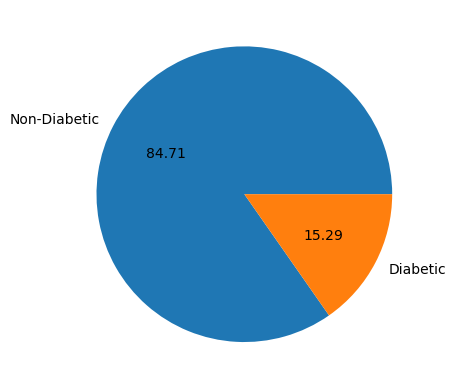

In [17]:
plt.pie(x= fulldf.Diabetes_binary.value_counts() , labels=['Non-Diabetic' , 'Diabetic'], autopct='%.02f');

0 - No Diabetes, 1 - Pre-Diabetic or Diabetic

Diabetes_binary
1.0     35097
0.0    194377
Name: count, dtype: int64

Diabetes_binary
1.0    15.294543%
0.0    84.705457%
Name: proportion, dtype: object

None


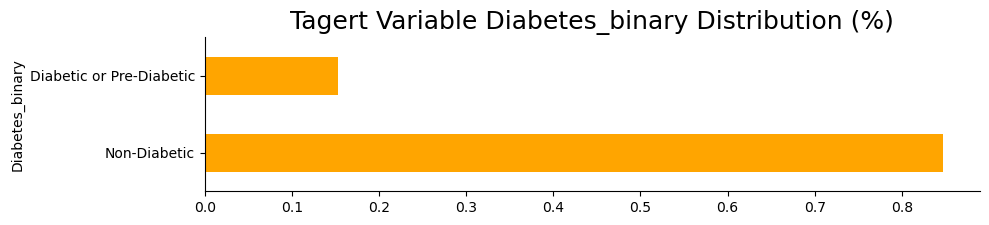

In [18]:
print("0 - No Diabetes, 1 - Pre-Diabetic or Diabetic")
print()
print(fulldf['Diabetes_binary'].value_counts(ascending=True))
print()
print(fulldf['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
print(fulldf['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2), color='orange').spines[['top', 'right']].set_visible(False));
plt.title('Tagert Variable Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic or Pre-Diabetic']);

### Correlation Analysis

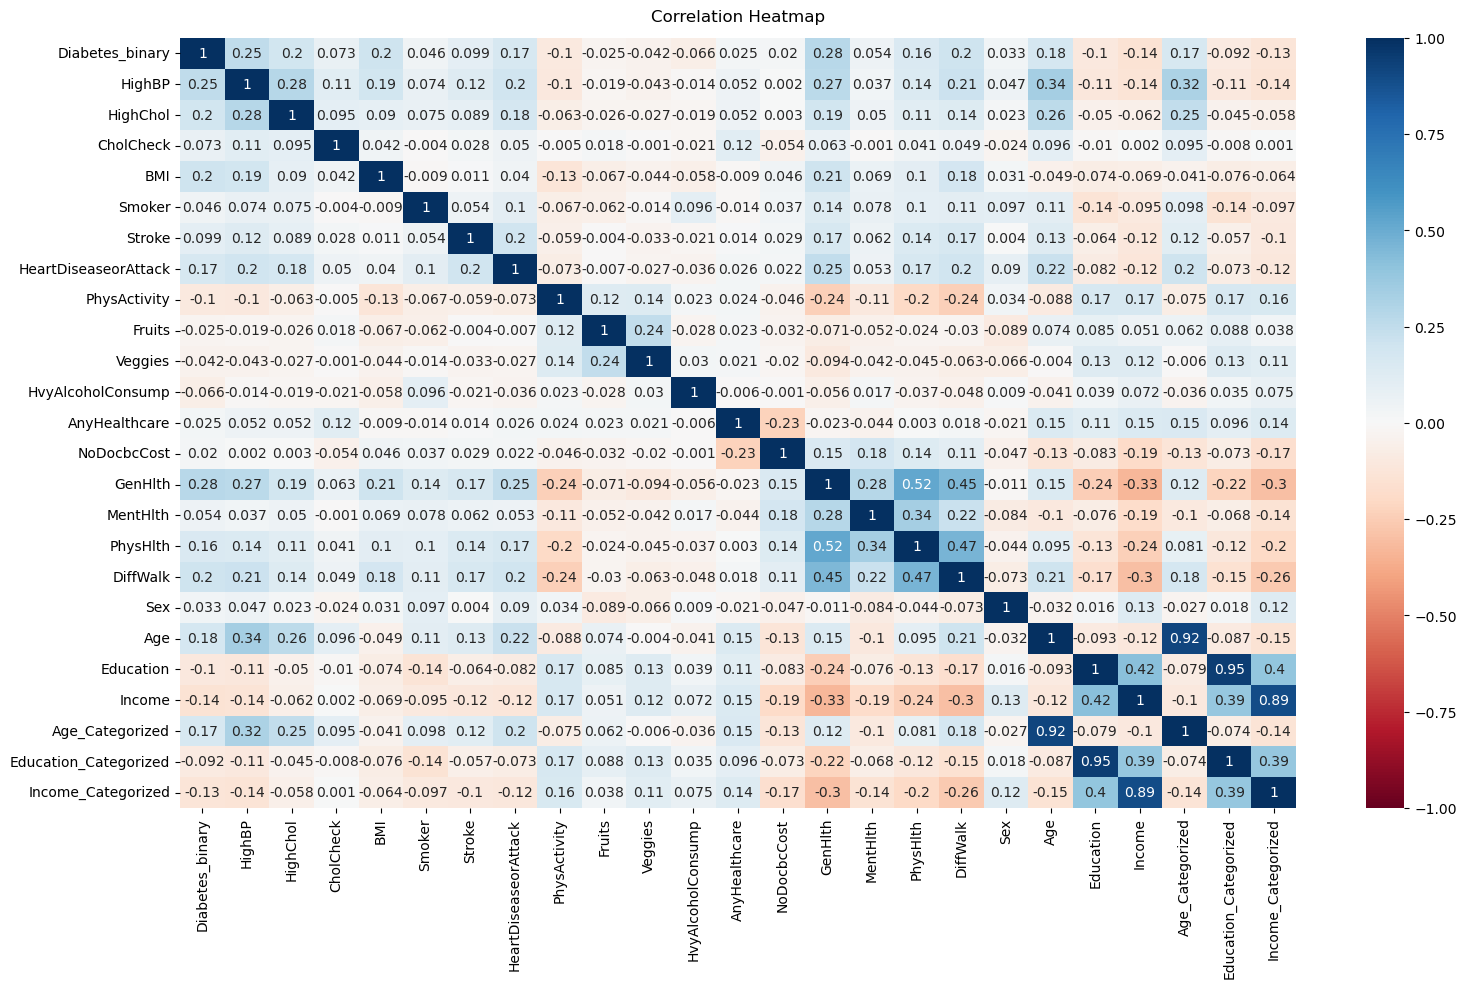

In [19]:
plt.figure(figsize=(18, 10))
heatmap = sns.heatmap(fulldf.corr().round(3), vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

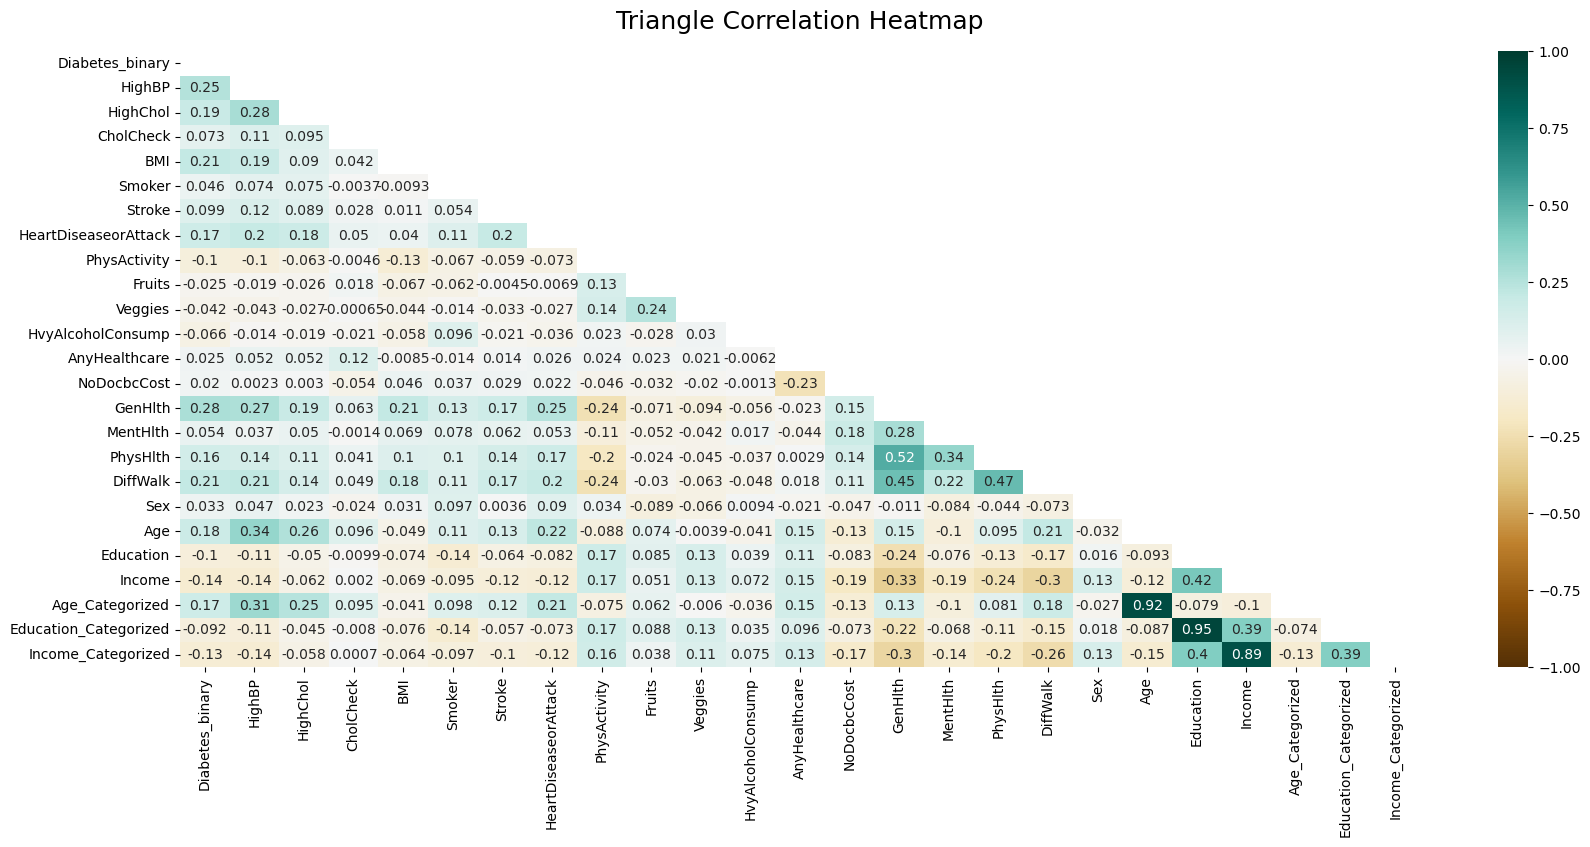

In [20]:
plt.figure(figsize=(20, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(fulldf.corr()))
heatmap = sns.heatmap(fulldf.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

- **The full correlation heatmap displays the relationships between all variables in the dataset**.  
- **Strong positive correlations are evident between Age and Age_Categorized (0.92) and Education and Education_Categorized (0.95), as expected due to their categorical transformations**.  
- **Health-related factors show moderate correlations, such as HighBP and Age (0.34) and DiffWalk with PhysHlth (0.45), indicating that older individuals and those with poor physical health tend to have mobility issues**.   
- **Negative correlations, like GenHlth with Income (-0.30), suggest that lower-income individuals report worse general health**  
- **NoDocbcCost also negatively correlates with Income (-0.33), implying that higher-income individuals are less likely to avoid doctor visits due to cost**.  
- **Most other correlations are weak (close to 0), suggesting minimal direct relationships between those variables**   
- **The heatmap provides valuable insights into health, socioeconomic, and demographic interactions within the dataset**. 

### Strength of Correlation

Text(0.5, 1.0, 'Features Correlating with Diabetes')

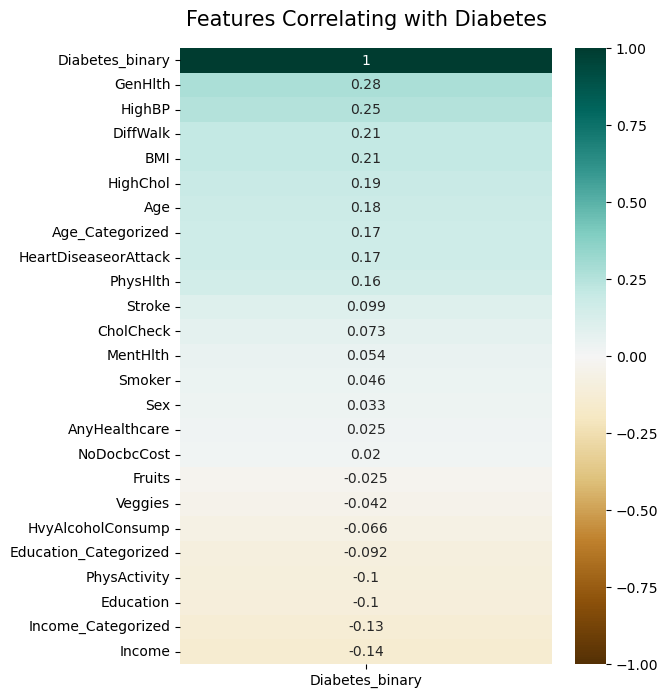

In [21]:
plt.figure(figsize=(6, 8))

heatmap = sns.heatmap(fulldf.corr()[['Diabetes_binary']].sort_values(by='Diabetes_binary', 
                    ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Diabetes', fontdict={'fontsize':15}, pad=16)

### Strength of Correlation Interpretation
#### Key Takeaways:
- ##### Most Positively Correlated Features (Higher Risk Factors):

- ##### GenHlth (0.28): General health condition has the strongest correlation, suggesting that individuals reporting poor general health are more likely to have diabetes.
- ##### HighBP (0.26): High blood pressure is a significant factor associated with diabetes.
- ##### BMI (0.21) & DiffWalk (0.21): Higher BMI (Body Mass Index) and difficulty in walking are also strongly correlated with diabetes, indicating mobility issues as a common trait in diabetic individuals.
- ##### HighChol (0.20): High cholesterol is another risk factor contributing to diabetes.
- ##### Age (0.18): Older individuals tend to have a higher likelihood of diabetes.
- ##### HeartDiseaseorAttack (0.17) & PhysHlth (0.16): Heart disease history and physical health issues are slightly correlated with diabetes.

#### Weakly Correlated Features:
- ##### Stroke (0.10), CholCheck (0.076), MentHlth (0.058), Smoker (0.047), Sex (0.032), AnyHealthcare (0.025), NoDocbcCost (0.024): These features have a low correlation with diabetes, meaning their impact on predicting diabetes is minimal.

#### Negatively Correlated Features (Protective Factors):
- ##### Fruits (-0.025) & Veggies (-0.043): While the correlation is weak, individuals consuming more fruits and vegetables may have a slightly lower likelihood of diabetes.
- ##### HvyAlcoholConsum (-0.067): Surprisingly, heavy alcohol consumption shows a negative correlation, but this may be due to other confounding health factors.
- ##### PhysActivity (-0.10): Regular physical activity reduces the likelihood of diabetes.
- ##### Education (-0.11) & Income (-0.15): Higher education levels and income are associated with lower diabetes rates, likely due to better healthcare access, diet, and lifestyle choices.

#### Conclusion:
- ##### Health and lifestyle factors such as BMI, blood pressure, cholesterol, and physical health play a major role in diabetes risk.
- ##### Age and mobility issues (difficulty walking) are also key indicators.
- ##### Healthy habits like physical activity, better education, and higher income levels tend to reduce diabetes risk.
- ##### However, some features like smoking, mental health, and stroke have weaker correlations, meaning their direct impact is less clear.

### Statistical Analysis to find Key Features

#### Bivariate Analysis using Chi-Square for Categorical predictors and T-Test for Continous predictors

In [22]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from scipy import stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

def load_and_prepare_data(df):
    """
    Load and prepare the data for ordinal logistic regression
    """
    
    # Define categorical and numerical features
    categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                          'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                          'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                          'DiffWalk', 'Sex','GenHlth','Age_Categorized','Education_Categorized','Income_Categorized']
    numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
    
    # Separate features and target
    X = df.drop(['Diabetes_binary'], axis=1)
    y = df['Diabetes_binary'].astype(int)  # Ensure target is int
    
    return X, y, numerical_features, categorical_features

def bivariate_analysis(X, y, numerical_features, categorical_features):
    """
    Perform bivariate analysis to identify significant features
    """
    bivariate_results = []
    
    # Process original categorical features
    for column in categorical_features:
        contingency_table = pd.crosstab(X[column], y)
        chi2, p_val = stats.chi2_contingency(contingency_table)[:2]
        bivariate_results.append({
            'Feature': column,
            'Test': 'Chi-square',
            'Statistic': chi2,
            'P-value': p_val
        })
    
    # Process numerical features
    for column in numerical_features:
        group_0 = X[y == 0][column].values
        group_1 = X[y == 1][column].values

        t_stat, p_val = stats.ttest_ind(group_0, group_1, equal_var=False)

        bivariate_results.append({
            'Feature': column,
            'Test': 'T-test',
            'Statistic': t_stat,
            'P-value': p_val
        })
    
    
    return pd.DataFrame(bivariate_results).sort_values('P-value')

In [23]:
def main(data):
    """
    Main function to run the feature selection process
    """
    # Load and prepare data
    X, y, numerical_features, categorical_features = load_and_prepare_data(data)
    
    # Perform univariate analysis
    print("Bivariate Analysis Results:")
    bivariate_results = bivariate_analysis(X, y, numerical_features, categorical_features)
    print(bivariate_results)

In [24]:
main(fulldf)

Bivariate Analysis Results:
                  Feature        Test     Statistic        P-value
0                  HighBP  Chi-square  14840.421805   0.000000e+00
18                    BMI      T-test    -91.959495   0.000000e+00
17     Income_Categorized  Chi-square   4005.884459   0.000000e+00
16  Education_Categorized  Chi-square   1938.056162   0.000000e+00
15        Age_Categorized  Chi-square   6687.971099   0.000000e+00
14                GenHlth  Chi-square  18193.703885   0.000000e+00
12               DiffWalk  Chi-square   9670.630180   0.000000e+00
20               PhysHlth      T-test    -61.969651   0.000000e+00
6            PhysActivity  Chi-square   2312.703694   0.000000e+00
5    HeartDiseaseorAttack  Chi-square   6491.585745   0.000000e+00
4                  Stroke  Chi-square   2256.534055   0.000000e+00
1                HighChol  Chi-square   8719.656978   0.000000e+00
2               CholCheck  Chi-square   1205.929127  3.138608e-264
9       HvyAlcoholConsump  Chi-squ

### Muiltivariate Analysis Logistic Regression

In [25]:
copydf = fulldf

In [26]:
copydf = copydf.astype(int)
copydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Diabetes_binary        229474 non-null  int64
 1   HighBP                 229474 non-null  int64
 2   HighChol               229474 non-null  int64
 3   CholCheck              229474 non-null  int64
 4   BMI                    229474 non-null  int64
 5   Smoker                 229474 non-null  int64
 6   Stroke                 229474 non-null  int64
 7   HeartDiseaseorAttack   229474 non-null  int64
 8   PhysActivity           229474 non-null  int64
 9   Fruits                 229474 non-null  int64
 10  Veggies                229474 non-null  int64
 11  HvyAlcoholConsump      229474 non-null  int64
 12  AnyHealthcare          229474 non-null  int64
 13  NoDocbcCost            229474 non-null  int64
 14  GenHlth                229474 non-null  int64
 15  MentHlth              

### Creating Dummy Variables for Categorical Features

In [27]:
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                          'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                          'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                          'DiffWalk', 'Sex','GenHlth','Age_Categorized','Education_Categorized','Income_Categorized']

copydf = pd.get_dummies(copydf, columns=categorical_features, drop_first=True)

In [28]:
copydf = copydf.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [29]:
copydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_binary          229474 non-null  int64
 1   BMI                      229474 non-null  int64
 2   MentHlth                 229474 non-null  int64
 3   PhysHlth                 229474 non-null  int64
 4   Age                      229474 non-null  int64
 5   Education                229474 non-null  int64
 6   Income                   229474 non-null  int64
 7   HighBP_1                 229474 non-null  int64
 8   HighChol_1               229474 non-null  int64
 9   CholCheck_1              229474 non-null  int64
 10  Smoker_1                 229474 non-null  int64
 11  Stroke_1                 229474 non-null  int64
 12  HeartDiseaseorAttack_1   229474 non-null  int64
 13  PhysActivity_1           229474 non-null  int64
 14  Fruits_1                 229474 non-null 

In [30]:
# Define the logistic regression model
mod_logistic = sm.Logit(copydf['Diabetes_binary'], 
                         copydf[['BMI', 'MentHlth', 'PhysHlth', 'HighBP_1', 'HighChol_1', 'CholCheck_1', 
                                 'Smoker_1', 'Stroke_1', 'HeartDiseaseorAttack_1', 'PhysActivity_1', 
                                 'Fruits_1', 'Veggies_1', 'HvyAlcoholConsump_1', 'AnyHealthcare_1', 
                                 'NoDocbcCost_1', 'DiffWalk_1', 'Sex_1', 'Age_Categorized_2', 
                                 'Age_Categorized_3', 'Education_Categorized_2', 'Education_Categorized_3', 
                                 'Income_Categorized_2', 'Income_Categorized_3', 'GenHlth_2', 
                                 'GenHlth_3', 'GenHlth_4', 'GenHlth_5']])

# Fit the model
res_log = mod_logistic.fit()

# Summary of results
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.372972
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229447
Method:                           MLE   Df Model:                           26
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1281
Time:                        14:58:45   Log-Likelihood:                -85587.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BMI                         0.0100      0.001     12.751      0.000       0.008       0.012
MentHlth                   -0.0095      0.001    -11.466      0.000      -0.011      -0.008
PhysHlth                   -0.0027      0.001     -3.387      0.001      -0.004      -0.001
HighBP_1                    0.8635      0.014     60.260      0.000       0.835       0.892
HighChol_1                  0.5707      0.013     42.979      0.000       0.545       0.597
CholCheck_1                -1.2621      0.026    -49.143      0.000      -1.312      -1.212
Smoker_1                   -0.1880      0.013    -14.731      0.000      -0.213      -0.163
Stroke_1                    0.1255      0.025      5.066      0.000       0.077       0.174
HeartDiseaseorAttack_1      0.3459      0.018     19.642      0.000       0.311       0.380
PhysActivity_1             -0.3197      0.013    -24.080      0.000      -0.346      -0.294
Fruits_1                   -0.1503      0.013    -11.556      0.000      -0.176      -0.125
Veggies_1                  -0.2720      0.015    -18.756      0.000      -0.300      -0.244
HvyAlcoholConsump_1        -0.9927      0.038    -26.088      0.000      -1.067      -0.918
AnyHealthcare_1            -1.0085      0.023    -43.061      0.000      -1.054      -0.963
NoDocbcCost_1              -0.4431      0.022    -20.009      0.000      -0.487      -0.400
DiffWalk_1                  0.2737      0.017     16.552      0.000       0.241       0.306
Sex_1                       0.0556      0.013      4.328      0.000       0.030       0.081
Age_Categorized_2          -0.0607      0.022     -2.820      0.005      -0.103      -0.019
Age_Categorized_3           0.2356      0.023     10.269      0.000       0.191       0.281
Education_Categorized_2    -0.1393      0.015     -9.127      0.000      -0.169      -0.109
Education_Categorized_3    -0.1820      0.016    -11.187      0.000      -0.214      -0.150
Income_Categorized_2       -0.2348      0.015    -15.400      0.000      -0.265      -0.205
Income_Categorized_3       -0.3118      0.018    -16.934      0.000      -0.348      -0.276
GenHlth_2                  -0.3734      0.023    -16.294      0.000      -0.418      -0.328
GenHlth_3                   0.2799      0.022     12.826      0.000       0.237       0.323
GenHlth_4                   0.7071      0.025     27.755      0.000       0.657       0.757
GenHlth_5                   0.8929      0.034     26.186      0.000       0.826       0.960
===========================================================================================
"""

In [31]:
# Building reduced model for GenHlth, Age, Education and Income because it has more than 2 categories
# Full model without GenHlth

mod_log_genhlth = sm.Logit(copydf['Diabetes_binary'],
                        copydf[['BMI', 'MentHlth', 'PhysHlth','HighBP_1','HighChol_1','CholCheck_1','Smoker_1','Stroke_1',
                               'HeartDiseaseorAttack_1','PhysActivity_1','Fruits_1','Veggies_1','HvyAlcoholConsump_1',
                               'AnyHealthcare_1','NoDocbcCost_1','DiffWalk_1','Sex_1','Age_Categorized_2','Age_Categorized_3',
                               'Education_Categorized_2','Education_Categorized_3','Income_Categorized_2','Income_Categorized_3']])

res_log_genhlth = mod_log_genhlth.fit()
res_log_genhlth.summary()

Optimization terminated successfully.
         Current function value: 0.379535
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229451
Method:                           MLE   Df Model:                           22
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1128
Time:                        14:58:46   Log-Likelihood:                -87093.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BMI                         0.0127      0.001     16.937      0.000       0.011       0.014
MentHlth                   -0.0057      0.001     -6.935      0.000      -0.007      -0.004
PhysHlth                    0.0103      0.001     14.752      0.000       0.009       0.012
HighBP_1                    0.9179      0.014     64.733      0.000       0.890       0.946
HighChol_1                  0.5927      0.013     45.027      0.000       0.567       0.618
CholCheck_1                -1.2160      0.025    -48.670      0.000      -1.265      -1.167
Smoker_1                   -0.1704      0.013    -13.521      0.000      -0.195      -0.146
Stroke_1                    0.1841      0.025      7.473      0.000       0.136       0.232
HeartDiseaseorAttack_1      0.4539      0.017     26.155      0.000       0.420       0.488
PhysActivity_1             -0.3666      0.013    -27.905      0.000      -0.392      -0.341
Fruits_1                   -0.1562      0.013    -12.114      0.000      -0.182      -0.131
Veggies_1                  -0.2821      0.014    -19.635      0.000      -0.310      -0.254
HvyAlcoholConsump_1        -1.0099      0.038    -26.673      0.000      -1.084      -0.936
AnyHealthcare_1            -1.0123      0.023    -43.953      0.000      -1.057      -0.967
NoDocbcCost_1              -0.3907      0.022    -17.789      0.000      -0.434      -0.348
DiffWalk_1                  0.4258      0.016     26.331      0.000       0.394       0.458
Sex_1                       0.0737      0.013      5.790      0.000       0.049       0.099
Age_Categorized_2          -0.0472      0.021     -2.225      0.026      -0.089      -0.006
Age_Categorized_3           0.2211      0.023      9.768      0.000       0.177       0.265
Education_Categorized_2    -0.1858      0.015    -12.309      0.000      -0.215      -0.156
Education_Categorized_3    -0.2467      0.016    -15.363      0.000      -0.278      -0.215
Income_Categorized_2       -0.3051      0.015    -20.285      0.000      -0.335      -0.276
Income_Categorized_3       -0.4170      0.018    -22.991      0.000      -0.453      -0.381
===========================================================================================
"""

In [32]:
from scipy.stats import chi2

# Likelihood Ratio Test for Global p-value - GenHlth
lr_stat = 2 * (res_log.llf - res_log_genhlth.llf)  # Test statistic
df_diff = res_log.df_model - res_log_genhlth.df_model  # Degrees of freedom difference
p_value = 1 - chi2.cdf(lr_stat, df_diff)  # Compute global p-value
print(f"\nGlobal p-value for GenHlth variable (Likelihood Ratio Test): {p_value:.4f}")


Global p-value for GenHlth variable (Likelihood Ratio Test): 0.0000


In [33]:
# Full model without Age

mod_log_age = sm.Logit(copydf['Diabetes_binary'],
                        copydf[['BMI', 'MentHlth', 'PhysHlth','HighBP_1','HighChol_1','CholCheck_1','Smoker_1','Stroke_1',
                               'HeartDiseaseorAttack_1','PhysActivity_1','Fruits_1','Veggies_1','HvyAlcoholConsump_1',
                               'AnyHealthcare_1','NoDocbcCost_1','DiffWalk_1','Sex_1',
                               'Education_Categorized_2','Education_Categorized_3','Income_Categorized_2','Income_Categorized_3',
                               'GenHlth_2','GenHlth_3','GenHlth_4','GenHlth_5']])

res_log_age = mod_log_age.fit()
res_log_age.summary()

Optimization terminated successfully.
         Current function value: 0.373925
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229449
Method:                           MLE   Df Model:                           24
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1259
Time:                        14:58:48   Log-Likelihood:                -85806.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BMI                         0.0074      0.001      9.663      0.000       0.006       0.009
MentHlth                   -0.0118      0.001    -14.450      0.000      -0.013      -0.010
PhysHlth                   -0.0029      0.001     -3.648      0.000      -0.004      -0.001
HighBP_1                    0.9072      0.014     64.542      0.000       0.880       0.935
HighChol_1                  0.5867      0.013     44.629      0.000       0.561       0.612
CholCheck_1                -1.2207      0.025    -48.440      0.000      -1.270      -1.171
Smoker_1                   -0.1788      0.013    -14.077      0.000      -0.204      -0.154
Stroke_1                    0.1430      0.025      5.765      0.000       0.094       0.192
HeartDiseaseorAttack_1      0.3902      0.018     22.292      0.000       0.356       0.425
PhysActivity_1             -0.3237      0.013    -24.432      0.000      -0.350      -0.298
Fruits_1                   -0.1281      0.013     -9.905      0.000      -0.153      -0.103
Veggies_1                  -0.2671      0.014    -18.451      0.000      -0.296      -0.239
HvyAlcoholConsump_1        -1.0066      0.038    -26.465      0.000      -1.081      -0.932
AnyHealthcare_1            -0.9265      0.023    -40.917      0.000      -0.971      -0.882
NoDocbcCost_1              -0.4950      0.022    -22.530      0.000      -0.538      -0.452
DiffWalk_1                  0.2987      0.016     18.119      0.000       0.266       0.331
Sex_1                       0.0462      0.013      3.609      0.000       0.021       0.071
Education_Categorized_2    -0.1447      0.015     -9.492      0.000      -0.175      -0.115
Education_Categorized_3    -0.1746      0.016    -10.756      0.000      -0.206      -0.143
Income_Categorized_2       -0.2510      0.015    -16.512      0.000      -0.281      -0.221
Income_Categorized_3       -0.3698      0.018    -20.363      0.000      -0.405      -0.334
GenHlth_2                  -0.3614      0.023    -15.861      0.000      -0.406      -0.317
GenHlth_3                   0.2864      0.022     13.188      0.000       0.244       0.329
GenHlth_4                   0.7059      0.025     27.805      0.000       0.656       0.756
GenHlth_5                   0.8819      0.034     25.925      0.000       0.815       0.949
===========================================================================================
"""

In [34]:
# Likelihood Ratio Test for Global p-value - Age
lr_stat1 = 2 * (res_log.llf - res_log_age.llf)  # Test statistic
df_diff1 = res_log.df_model - res_log_age.df_model  # Degrees of freedom difference
p_value = 1 - chi2.cdf(lr_stat1, df_diff1)  # Compute global p-value
print(f"\nGlobal p-value for Age variable (Likelihood Ratio Test): {p_value:.4f}")


Global p-value for Age variable (Likelihood Ratio Test): 0.0000


In [35]:
# Full model without Education

mod_log_edu = sm.Logit(copydf['Diabetes_binary'],
                        copydf[['BMI', 'MentHlth', 'PhysHlth','HighBP_1','HighChol_1','CholCheck_1','Smoker_1','Stroke_1',
                               'HeartDiseaseorAttack_1','PhysActivity_1','Fruits_1','Veggies_1','HvyAlcoholConsump_1',
                               'AnyHealthcare_1','NoDocbcCost_1','DiffWalk_1','Sex_1','Age_Categorized_2','Age_Categorized_3',
                               'Income_Categorized_2','Income_Categorized_3',
                               'GenHlth_2','GenHlth_3','GenHlth_4','GenHlth_5']])

res_log_edu = mod_log_edu.fit()
res_log_edu.summary()

Optimization terminated successfully.
         Current function value: 0.373290
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229449
Method:                           MLE   Df Model:                           24
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1274
Time:                        14:58:49   Log-Likelihood:                -85660.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
BMI                        0.0094      0.001     12.070      0.000       0.008       0.011
MentHlth                  -0.0098      0.001    -11.822      0.000      -0.011      -0.008
PhysHlth                  -0.0030      0.001     -3.751      0.000      -0.005      -0.001
HighBP_1                   0.8689      0.014     60.679      0.000       0.841       0.897
HighChol_1                 0.5703      0.013     42.965      0.000       0.544       0.596
CholCheck_1               -1.2726      0.026    -49.707      0.000      -1.323      -1.222
Smoker_1                  -0.1787      0.013    -14.069      0.000      -0.204      -0.154
Stroke_1                   0.1238      0.025      4.995      0.000       0.075       0.172
HeartDiseaseorAttack_1     0.3452      0.018     19.603      0.000       0.311       0.380
PhysActivity_1            -0.3345      0.013    -25.314      0.000      -0.360      -0.309
Fruits_1                  -0.1582      0.013    -12.182      0.000      -0.184      -0.133
Veggies_1                 -0.2881      0.014    -19.963      0.000      -0.316      -0.260
HvyAlcoholConsump_1       -0.9983      0.038    -26.237      0.000      -1.073      -0.924
AnyHealthcare_1           -1.0356      0.023    -44.499      0.000      -1.081      -0.990
NoDocbcCost_1             -0.4522      0.022    -20.425      0.000      -0.496      -0.409
DiffWalk_1                 0.2740      0.017     16.573      0.000       0.242       0.306
Sex_1                      0.0529      0.013      4.121      0.000       0.028       0.078
Age_Categorized_2         -0.0608      0.021     -2.830      0.005      -0.103      -0.019
Age_Categorized_3          0.2341      0.023     10.225      0.000       0.189       0.279
Income_Categorized_2      -0.2716      0.015    -18.206      0.000      -0.301      -0.242
Income_Categorized_3      -0.3764      0.017    -21.633      0.000      -0.410      -0.342
GenHlth_2                 -0.3782      0.023    -16.547      0.000      -0.423      -0.333
GenHlth_3                  0.2839      0.022     13.043      0.000       0.241       0.327
GenHlth_4                  0.7217      0.025     28.402      0.000       0.672       0.771
GenHlth_5                  0.9125      0.034     26.808      0.000       0.846       0.979
==========================================================================================
"""

In [36]:
# Likelihood Ratio Test for Global p-value - Education
lr_stat2 = 2 * (res_log.llf - res_log_edu.llf)  # Test statistic
df_diff2 = res_log.df_model - res_log_edu.df_model  # Degrees of freedom difference
p_value = 1 - chi2.cdf(lr_stat2, df_diff2)  # Compute global p-value
print(f"\nGlobal p-value for Education variable (Likelihood Ratio Test): {p_value:.4f}")


Global p-value for Education variable (Likelihood Ratio Test): 0.0000


In [37]:
# Full model without Income

mod_log_inc = sm.Logit(copydf['Diabetes_binary'],
                        copydf[['BMI', 'MentHlth', 'PhysHlth','HighBP_1','HighChol_1','CholCheck_1','Smoker_1','Stroke_1',
                               'HeartDiseaseorAttack_1','PhysActivity_1','Fruits_1','Veggies_1','HvyAlcoholConsump_1',
                               'AnyHealthcare_1','NoDocbcCost_1','DiffWalk_1','Sex_1','Age_Categorized_2','Age_Categorized_3',
                               'Education_Categorized_2','Education_Categorized_3',
                               'GenHlth_2','GenHlth_3','GenHlth_4','GenHlth_5']])

res_log_inc = mod_log_inc.fit()
res_log_inc.summary()

Optimization terminated successfully.
         Current function value: 0.373759
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               229474
Model:                          Logit   Df Residuals:                   229449
Method:                           MLE   Df Model:                           24
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1263
Time:                        14:58:51   Log-Likelihood:                -85768.
converged:                       True   LL-Null:                       -98165.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BMI                         0.0093      0.001     11.941      0.000       0.008       0.011
MentHlth                   -0.0087      0.001    -10.541      0.000      -0.010      -0.007
PhysHlth                   -0.0026      0.001     -3.324      0.001      -0.004      -0.001
HighBP_1                    0.8721      0.014     60.938      0.000       0.844       0.900
HighChol_1                  0.5669      0.013     42.740      0.000       0.541       0.593
CholCheck_1                -1.2815      0.026    -50.068      0.000      -1.332      -1.231
Smoker_1                   -0.1857      0.013    -14.570      0.000      -0.211      -0.161
Stroke_1                    0.1411      0.025      5.695      0.000       0.093       0.190
HeartDiseaseorAttack_1      0.3524      0.018     20.016      0.000       0.318       0.387
PhysActivity_1             -0.3265      0.013    -24.627      0.000      -0.352      -0.301
Fruits_1                   -0.1524      0.013    -11.730      0.000      -0.178      -0.127
Veggies_1                  -0.2926      0.014    -20.258      0.000      -0.321      -0.264
HvyAlcoholConsump_1        -1.0185      0.038    -26.801      0.000      -1.093      -0.944
AnyHealthcare_1            -1.0718      0.023    -46.272      0.000      -1.117      -1.026
NoDocbcCost_1              -0.4076      0.022    -18.452      0.000      -0.451      -0.364
DiffWalk_1                  0.3064      0.016     18.628      0.000       0.274       0.339
Sex_1                       0.0187      0.013      1.473      0.141      -0.006       0.044
Age_Categorized_2          -0.0876      0.021     -4.085      0.000      -0.130      -0.046
Age_Categorized_3           0.2438      0.023     10.652      0.000       0.199       0.289
Education_Categorized_2    -0.1820      0.015    -12.067      0.000      -0.212      -0.152
Education_Categorized_3    -0.2795      0.015    -18.222      0.000      -0.310      -0.249
GenHlth_2                  -0.3774      0.023    -16.515      0.000      -0.422      -0.333
GenHlth_3                   0.2946      0.022     13.552      0.000       0.252       0.337
GenHlth_4                   0.7473      0.025     29.484      0.000       0.698       0.797
GenHlth_5                   0.9427      0.034     27.743      0.000       0.876       1.009
===========================================================================================
"""

In [38]:
# Likelihood Ratio Test for Global p-value - Income
lr_stat3 = 2 * (res_log.llf - res_log_inc.llf)  # Test statistic
df_diff3 = res_log.df_model - res_log_inc.df_model  # Degrees of freedom difference
p_value = 1 - chi2.cdf(lr_stat3, df_diff3)  # Compute global p-value
print(f"\nGlobal p-value for Income variable (Likelihood Ratio Test): {p_value:.4f}")


Global p-value for Income variable (Likelihood Ratio Test): 0.0000


#### Based on the results of the Bivariate Analysis and Multivariate Analysis, we can see that all Features are statistically significant. Hence we use all predictors in our ML model

### Visualizing Key Features

In [39]:
fulldf = fulldf.astype(int)

#### KDE Plot for Numerical Features

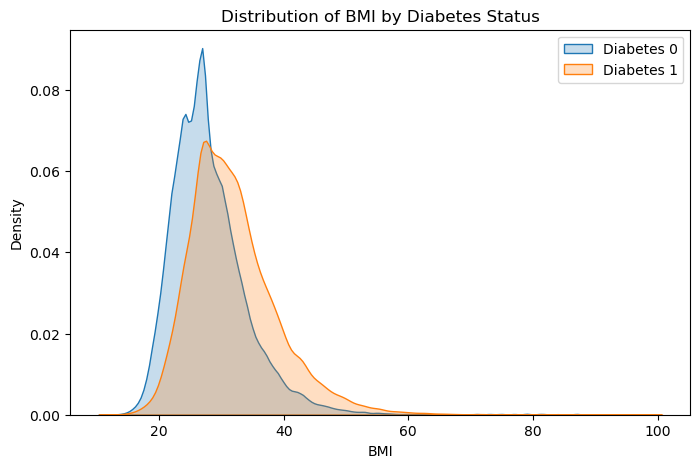

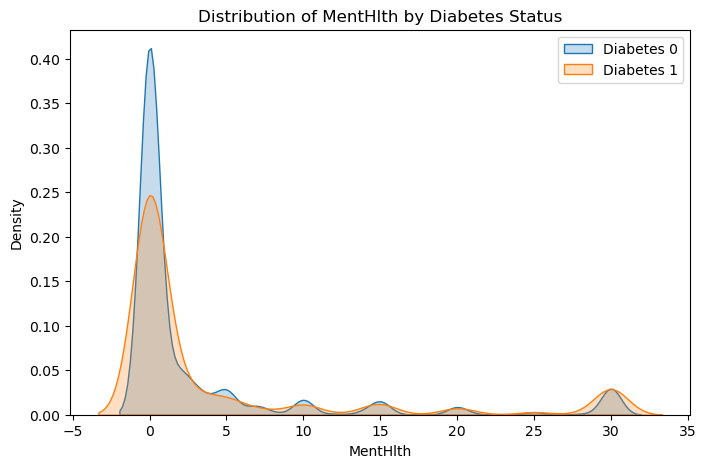

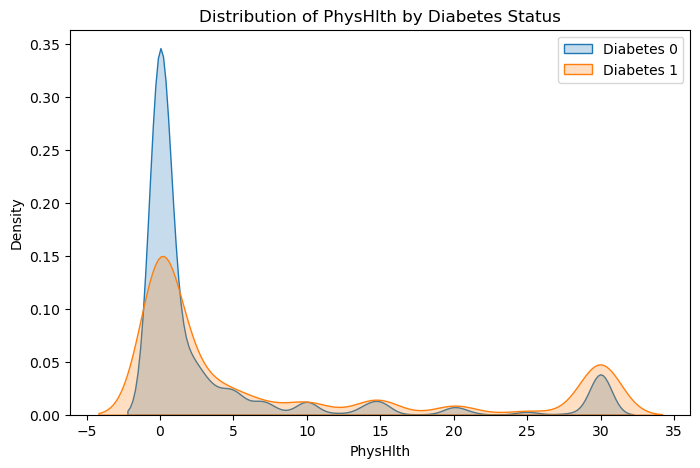

In [40]:
numerical_features = ['BMI','MentHlth','PhysHlth']
# Iterate over each numerical feature and plot KDE
for feature in numerical_features:
    plt.figure(figsize=(8, 5))

    # Plot KDE for each Diabetes_012 category
    for diabetes_status in sorted(fulldf['Diabetes_binary'].unique()):
        sns.kdeplot(
            fulldf[fulldf['Diabetes_binary'] == diabetes_status][feature], 
            label=f'Diabetes {diabetes_status}', 
            fill=True
        )

    # Titles and labels
    plt.title(f"Distribution of {feature} by Diabetes Status")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

<Axes: xlabel='Diabetes_binary', ylabel='count'>

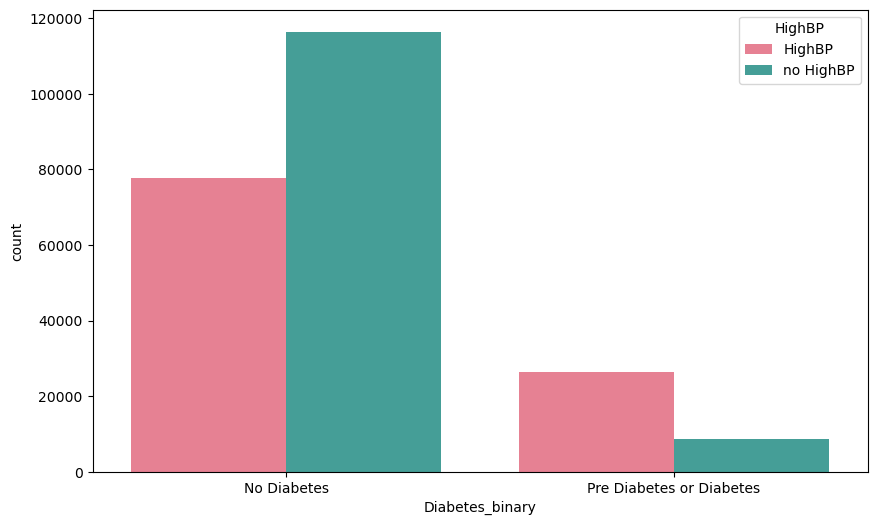

In [41]:
# HIGH BP

plt.figure(figsize=(10,6))
sns.countplot(data=fulldf,x=fulldf['Diabetes_binary'].map({0: 'No Diabetes', 1: 'Pre Diabetes or Diabetes'}),
              hue=fulldf['HighBP'].map({0: 'no HighBP', 1: 'HighBP'}),palette='husl')

<Axes: xlabel='Diabetes_binary', ylabel='HighBP'>

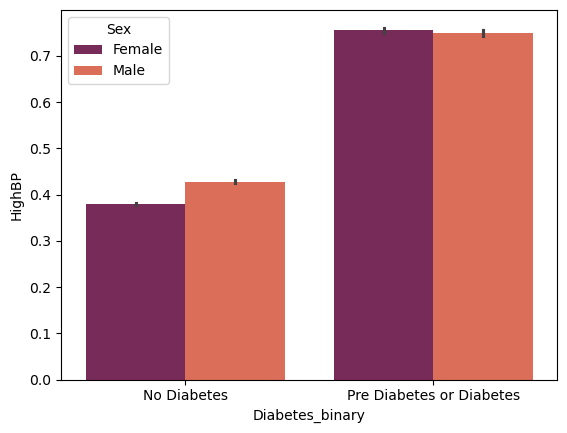

In [42]:
sns.barplot(data=fulldf, x=fulldf['Diabetes_binary'].map({0: 'No Diabetes', 1: 'Pre Diabetes or Diabetes'}),
            y='HighBP', hue=fulldf['Sex'].map({0: 'Female', 1: 'Male'}), palette='rocket')

<Axes: xlabel='Diabetes_binary', ylabel='count'>

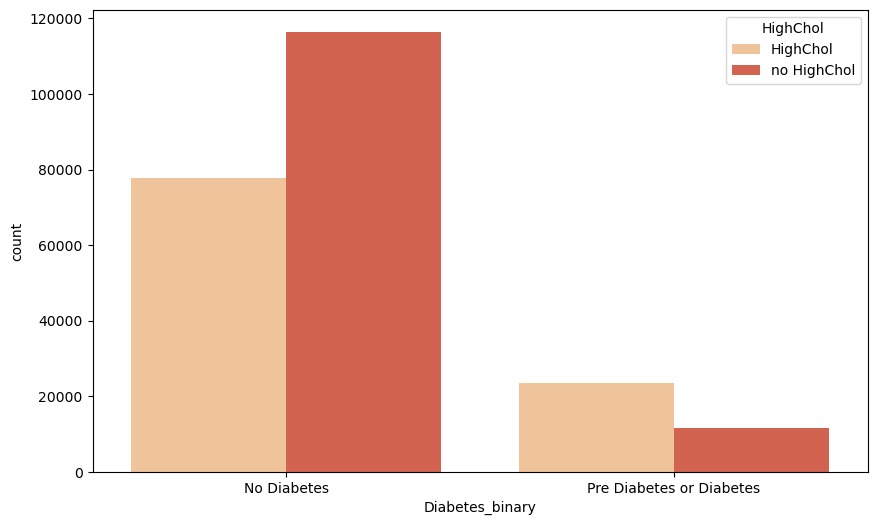

In [43]:
# HIGH CHOL

plt.figure(figsize=(10,6))
sns.countplot(data=fulldf,x=fulldf['Diabetes_binary'].map({0: 'No Diabetes', 1: 'Pre Diabetes or Diabetes'}),
              hue=fulldf['HighChol'].map({0: 'no HighChol', 1: 'HighChol'}),palette='OrRd')

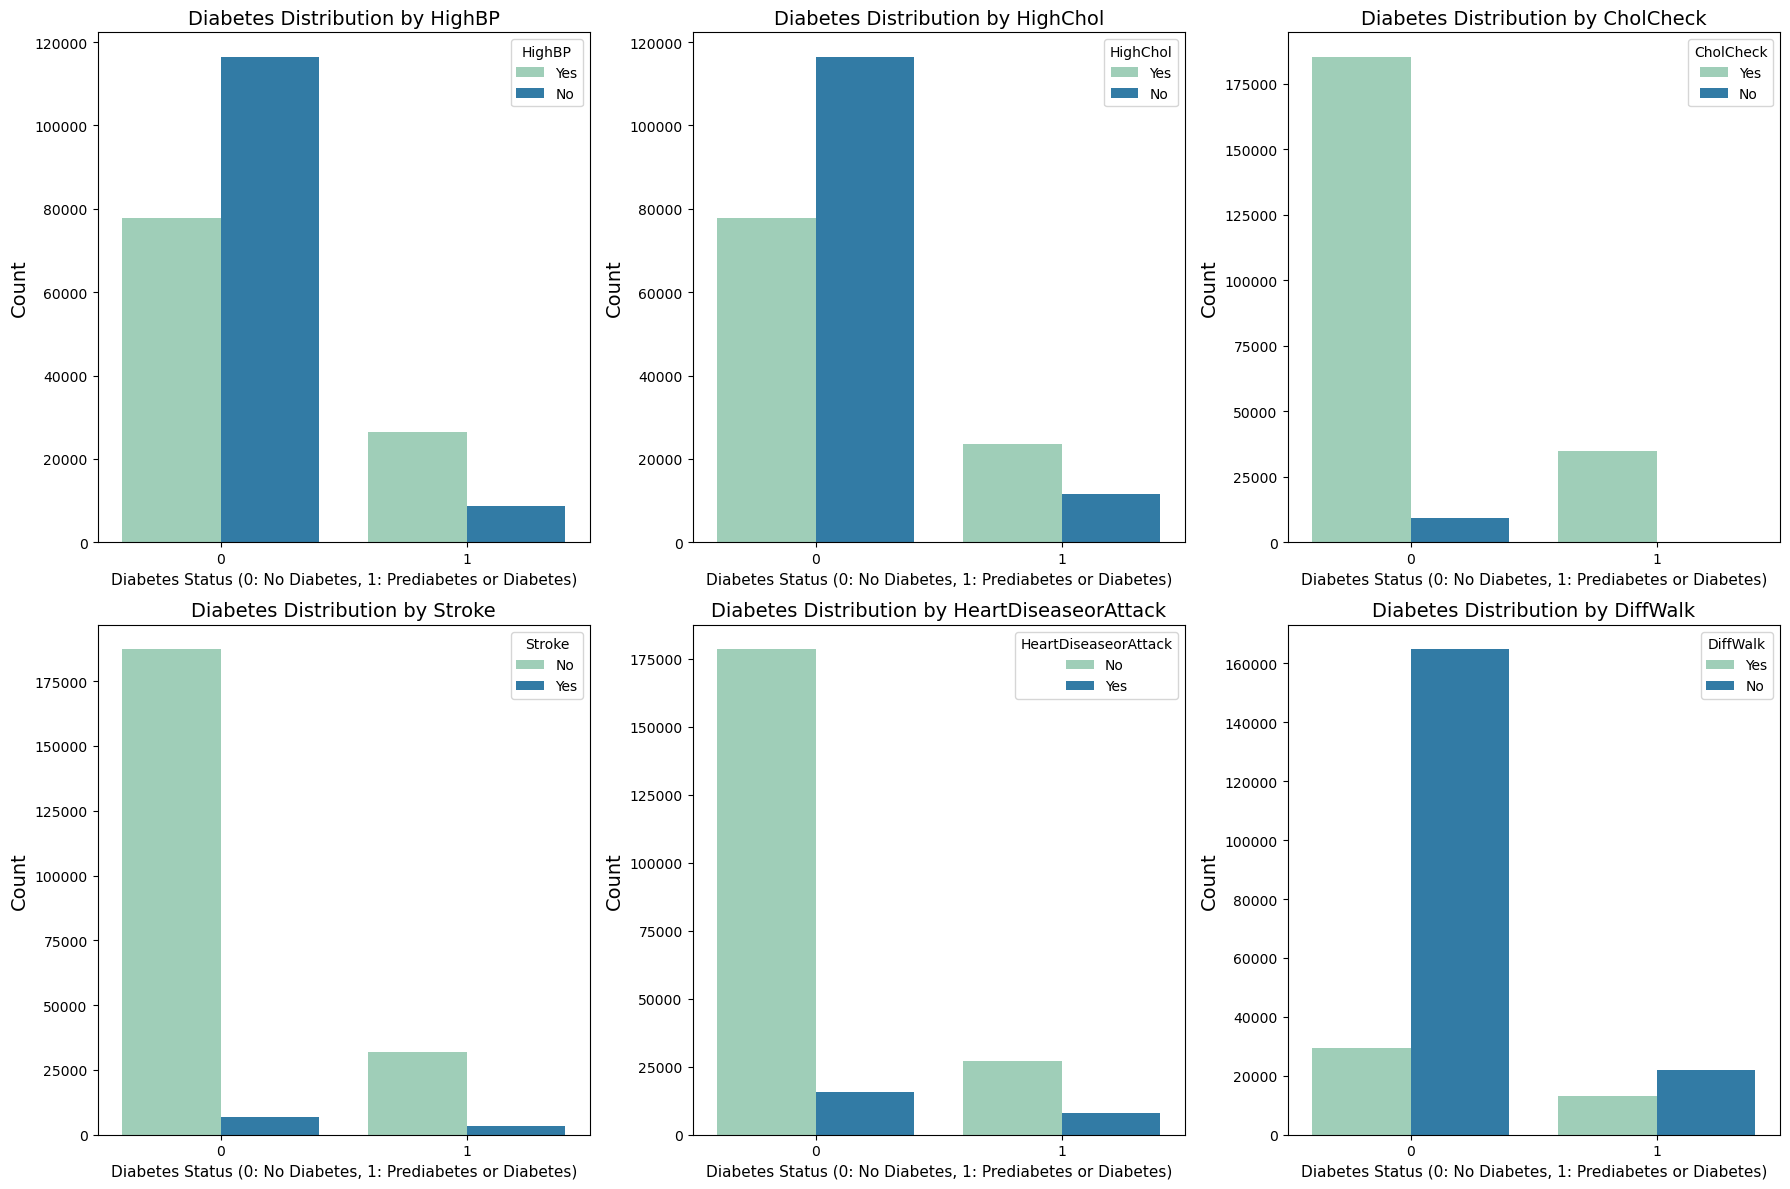

In [44]:
health_factors = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']

# Set up the figure
fig, axes = plt.subplots(2, 3, figsize=(18,12))
axes = axes.ravel()

for idx, factor in enumerate(health_factors):
    sns.countplot(x='Diabetes_binary', hue=fulldf[factor].map({0: 'No', 1: 'Yes'}), data=fulldf, ax=axes[idx], palette='YlGnBu')

    # Set titles and labels
    axes[idx].set_title(f'Diabetes Distribution by {factor}', fontsize=14)
    axes[idx].set_xlabel('Diabetes Status (0: No Diabetes, 1: Prediabetes or Diabetes)', fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=14)
    
plt.tight_layout()
plt.show()

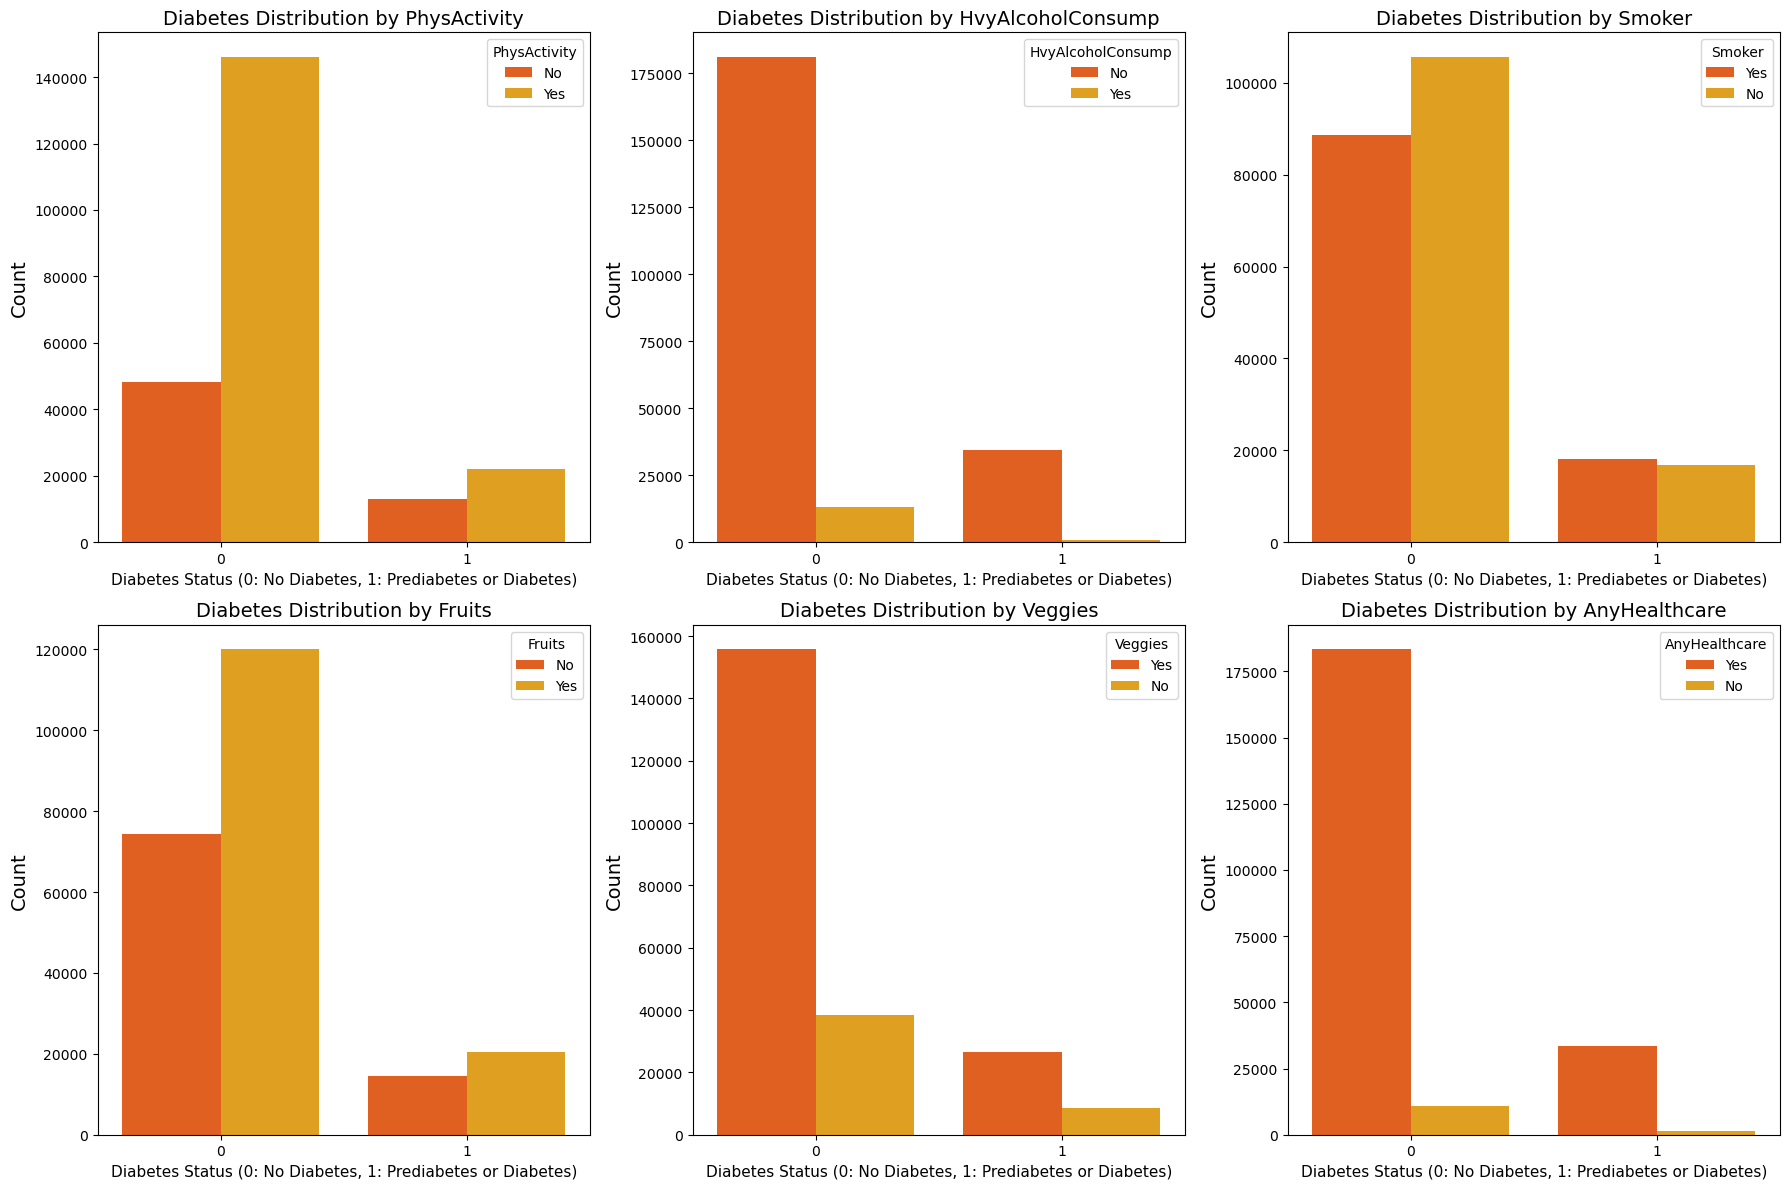

In [45]:
lifestyle_factors = ['PhysActivity', 'HvyAlcoholConsump', 'Smoker', 'Fruits', 'Veggies', 'AnyHealthcare']

# Set up the figure
fig, axes = plt.subplots(2,3, figsize=(18,12))
axes = axes.ravel()

for idx, factor in enumerate(lifestyle_factors):
    sns.countplot(x='Diabetes_binary', hue=fulldf[factor].map({0: 'No', 1: 'Yes'}), data=fulldf, ax=axes[idx], palette='autumn')

    # Set titles and labels
    axes[idx].set_title(f'Diabetes Distribution by {factor}', fontsize=14)
    axes[idx].set_xlabel('Diabetes Status (0: No Diabetes, 1: Prediabetes or Diabetes)', fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=14)
    
plt.tight_layout()
plt.show()

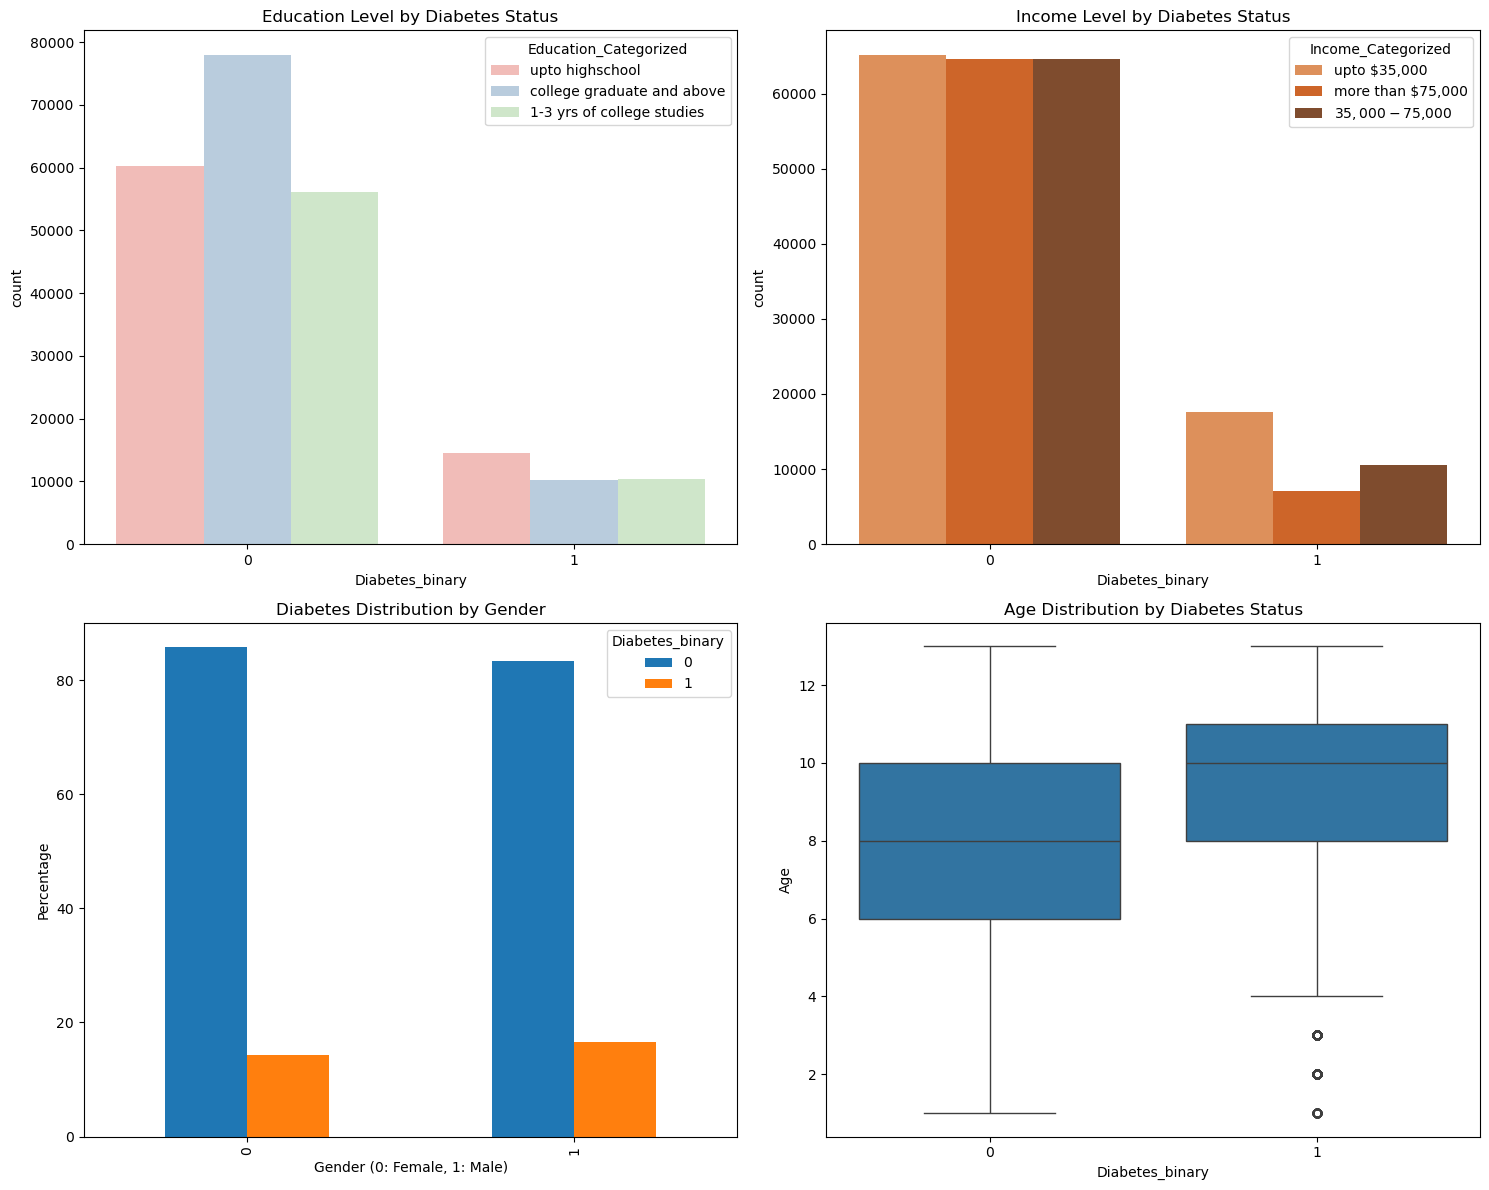

In [46]:
"""
Analyze demographic factors
"""
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Education level distribution
sns.countplot(data=fulldf, x='Diabetes_binary', hue=fulldf['Education_Categorized'].map({1:'upto highschool',
               2:'1-3 yrs of college studies',3:'college graduate and above'}),
              ax=axes[0,0], palette='Pastel1')
axes[0,0].set_title('Education Level by Diabetes Status')

# Income level distribution
sns.countplot(data=fulldf, x='Diabetes_binary', hue=fulldf['Income_Categorized'].map({1:'upto $35,000',
                                                        2:'$35,000-$75,000',3:'more than $75,000'}),
              ax=axes[0,1], palette='Oranges_d')
axes[0,1].set_title('Income Level by Diabetes Status')

# Gender distribution
df_gender = fulldf.groupby('Sex')['Diabetes_binary'].value_counts(normalize=True).unstack() * 100
df_gender.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Diabetes Distribution by Gender')
axes[1,0].set_xlabel('Gender (0: Female, 1: Male)')
axes[1,0].set_ylabel('Percentage')

# Age distribution
sns.boxplot(data=fulldf, x='Diabetes_binary', y='Age', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Diabetes Status')

plt.tight_layout()
plt.show()

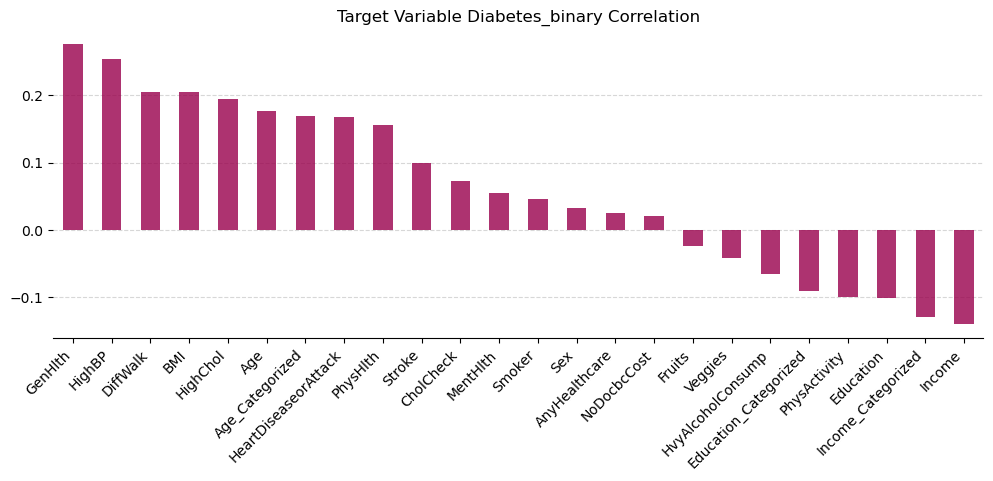

In [47]:
(fulldf.drop('Diabetes_binary', axis=1)
   .corrwith(fulldf.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Target Variable Diabetes_binary Correlation", alpha=0.8, zorder=3, color='#99004C')
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=10);

### Resampling Methods

In [48]:
#pip install --upgrade scikit-learn imbalanced-learn

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN


# Define features (X) and target (y)
X = fulldf.drop(columns=['Diabetes_binary'])  # Drop target variable
y = fulldf['Diabetes_binary']  # Target variable

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to train model and evaluate performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability for ROC & PR AUC

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'AUROC': roc_auc_score(y_test, y_proba),
        # 'PR AUC': auc(*precision_recall_curve(y_test, y_proba)[:2])
    }
    return metrics

# Initialize logistic regression model
log_reg = LogisticRegression(solver='liblinear')

# Baseline Model (No Resampling)
results = {'Baseline': evaluate_model(log_reg, X_train, y_train, X_test, y_test)}

# Resampling Techniques
sampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Undersampling (RUS)': RandomUnderSampler(random_state=42),
    'Edited Nearest Neighbors (ENN)': EditedNearestNeighbours(),
    'SMOTE-ENN': SMOTEENN(random_state=42)
}

# Train model on each resampling technique
for method, sampler in sampling_methods.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    results[method] = evaluate_model(log_reg, X_resampled, y_resampled, X_test, y_test)

# Convert results to DataFrame and print
resamplingResults_df = pd.DataFrame(results).T
print(resamplingResults_df)

                                Accuracy  F1 Score    Recall  Precision  \
Baseline                        0.850594  0.239716  0.154011   0.540500   
SMOTE                           0.716287  0.448800  0.755236   0.319260   
ADASYN                          0.705393  0.445019  0.772332   0.312558   
Random Undersampling (RUS)      0.715525  0.449532  0.759510   0.319241   
Edited Nearest Neighbors (ENN)  0.811461  0.458951  0.522867   0.408959   
SMOTE-ENN                       0.654298  0.427468  0.843852   0.286232   

                                   AUROC  
Baseline                        0.810221  
SMOTE                           0.809622  
ADASYN                          0.808667  
Random Undersampling (RUS)      0.810464  
Edited Nearest Neighbors (ENN)  0.809721  
SMOTE-ENN                       0.810464  


#### Key Observations from the above resampling techniques

- **Baseline Model:** 
  - High Accuracy (85%), but poor recall (15%) and F1-score (~24%).  
  - This suggests the model is biased towards the majority class and fails to detect the minority class (likely diabetes-positive cases).
  
- **SMOTE & ADASYN (Oversampling):** 
  - Higher recall (75-77%) meaning better detection of the minority class.
  - Lower precision (31%) meaning more false positives.
  - Overall F1-score (44-45%) is an improvement over the baseline.
  
- **Random Undersampling (RUS):**
  - Similar pattern to SMOTE, but slightly worse recall (~75%).
  - F1-score (~45%) is still better than the baseline.
  
- **Edited Nearest Neighbors (ENN) (Undersampling):**
  - Highest accuracy (81%) among undersampling methods.
  - Balanced recall (52%) and precision (41%), which might be a good trade-off.
  
- **SMOTE-ENN (Combination of Oversampling & Undersampling):** 
  - Best recall (84%), meaning it catches almost all minority class instances.
  - Lowest precision (28%), meaning a lot of false positives.
  - Accuracy (65%)) dropped significantly due to balancing the classes.

- **All resampling methods achieve very similar AUROC values (~0.81), indicating they perform comparably in distinguishing between positive and negative classes.** 

#### Which Resampling Method is Best?
- If we prioritize recall (catching all positive cases)
  - SMOTE-ENN (Recall = 84%) is the best, but at the cost of low precision.
  - If you're working on a medical application, recall is critical (you don’t want to miss diabetic patients).
- If we want a balance between recall & precision
  - ENN (F1-score = 45%, Recall = 52%, Precision = 41%) seems like a good choice.
  - SMOTE or ADASYN also provide decent balance but slightly favor recall over precision.
- If we care about overall accuracy & a conservative model
  - Baseline (85%) is highest but fails in detecting the minority class.
  - ENN (81%) still keeps accuracy high while improving recall.
